In [2]:
!pip install tensorflow==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install n2v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
import n2v
print(tf.__version__)
print(n2v.__version__)

2.10.0
0.3.2


In [5]:
from n2v.models import N2VConfig, N2V
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import numpy as np
import urllib
import os
import zipfile
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
datagen = N2V_DataGenerator()

In [7]:
imgs = datagen.load_imgs_from_directory(directory = "/content/drive/MyDrive/Colab Notebooks/Kodak_Dataset/",
                                        filter = '*.png', dims='YXC')
# imgs[0] = imgs[0][..., :3]
print('shape of loaded images: ', imgs[0].shape)
print('The data type of the first image is: ', imgs[0].dtype)

shape of loaded images:  (1, 512, 768, 3)
The data type of the first image is:  float32


In [8]:
print(len(imgs))
print(imgs[0].shape)
print(imgs[0].dtype)

24
(1, 512, 768, 3)
float32


In [ ]:
noisy_imgs = []

for img in imgs:
  noise =  np.random.normal(loc=0, scale=1, size=img.shape)
  print(img.shape)
  print(noise)
  noisy_img = np.clip((img + noise*0.1),0,1)
  noisy_imgs.append(noisy_img)

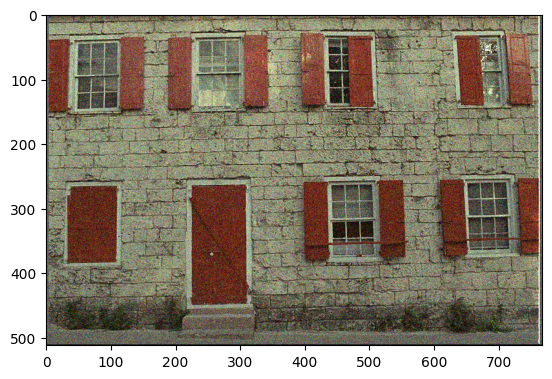

In [10]:
plt.figure()
plt.imshow(noisy_imgs[0][0,:,:,:])
plt.show()
imgs = noisy_imgs

In [11]:
patch_size = 64

In [12]:
patch_shape = (patch_size, patch_size)
patches = datagen.generate_patches_from_list(imgs, shape=patch_shape)

Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)
Generated patches: (768, 64, 64, 3)


In [13]:
patches.shape

(18432, 64, 64, 3)

In [14]:
train_val_split = int(patches.shape[0] * 0.8)
X = patches[:train_val_split]
X_val = patches[train_val_split:]

In [15]:
print(X.shape)
print(X.dtype)
print(X_val.shape)

(14745, 64, 64, 3)
float64
(3687, 64, 64, 3)


Text(0.5, 1.0, 'Validation Patch')

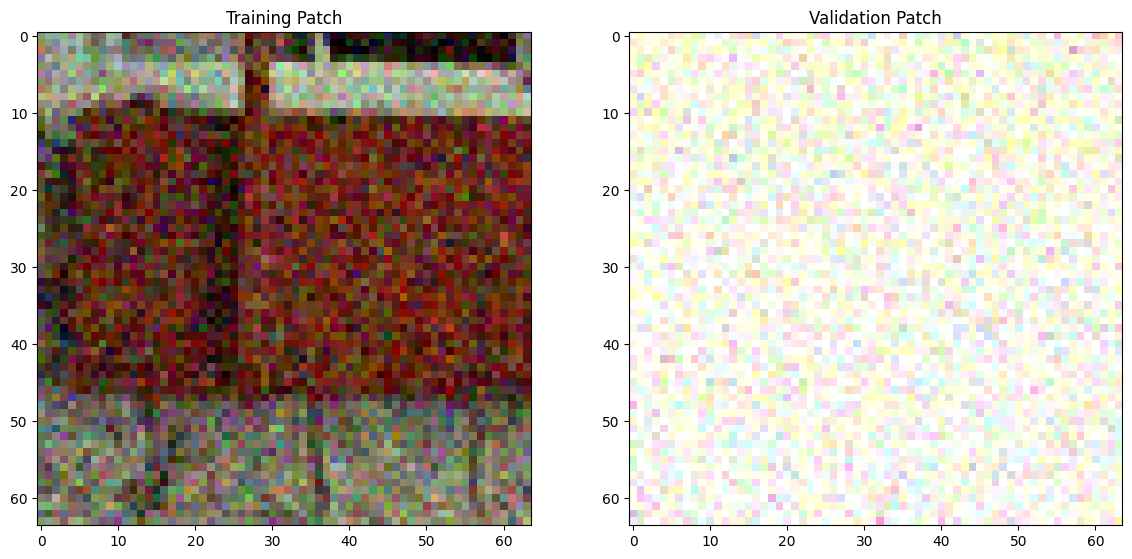

In [16]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(X[0, ...])
plt.title('Training Patch')
plt.subplot(1, 2, 2)
plt.imshow(X_val[0, ...])
plt.title('Validation Patch')

In [17]:
train_batch = 32
print('X.shape[0] = ', X.shape[0])
config = N2VConfig(X, unet_kern_size=3, 
                   unet_n_first=64, unet_n_depth=3, train_steps_per_epoch=int(X.shape[0]/train_batch), train_epochs=20, train_loss='mse', 
                   batch_norm=True, train_batch_size=train_batch, n2v_perc_pix=0.198, n2v_patch_shape=(patch_size, patch_size), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=False)

vars(config)

X.shape[0] =  14745


{'means': ['0.4565189706789642', '0.41680446257667203', '0.3505038902310654'],
 'stds': ['0.22550084723424826', '0.2394408154838168', '0.22600882364082708'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 3,
 'n_channel_out': 3,
 'unet_residual': False,
 'unet_n_depth': 3,
 'unet_kern_size': 3,
 'unet_n_first': 64,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 3),
 'train_loss': 'mse',
 'train_epochs': 20,
 'train_steps_per_epoch': 460,
 'train_learning_rate': 0.0004,
 'train_batch_size': 32,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'single_net_per_channel': False,
 'blurpool': False,
 'skip_skipone': False,
 'structN2Vmask': None,
 'probabilistic': False}

In [18]:
model_name = 'n2v_2D_kodak_dataset_01'
basedir = 'models'
model = N2V(config, model_name, basedir=basedir)

/usr/local/lib/python3.9/dist-packages/n2v/models/n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: /content/models/n2v_2D_kodak_dataset_01
  warnings.warn(


In [19]:
history = model.train(X, X_val)

8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 3687/3687 [00:05<00:00, 704.59it/s]


Epoch 1/20
460/460 [==============================] - 59s 103ms/step - loss: 0.2892 - n2v_mse: 0.2892 - n2v_abs: 0.4220 - val_loss: 0.2325 - val_n2v_mse: 0.2320 - val_n2v_abs: 0.3774 - lr: 4.0000e-04
Epoch 2/20
460/460 [==============================] - 41s 90ms/step - loss: 0.2368 - n2v_mse: 0.2368 - n2v_abs: 0.3888 - val_loss: 0.2567 - val_n2v_mse: 0.2561 - val_n2v_abs: 0.3981 - lr: 4.0000e-04
Epoch 3/20
460/460 [==============================] - 44s 95ms/step - loss: 0.2270 - n2v_mse: 0.2270 - n2v_abs: 0.3811 - val_loss: 0.2350 - val_n2v_mse: 0.2345 - val_n2v_abs: 0.3788 - lr: 4.0000e-04
Epoch 4/20
460/460 [==============================] - 41s 88ms/step - loss: 0.2254 - n2v_mse: 0.2254 - n2v_abs: 0.3795 - val_loss: 0.2343 - val_n2v_mse: 0.2339 - val_n2v_abs: 0.3805 - lr: 4.0000e-04
Epoch 5/20
460/460 [==============================] - 44s 96ms/step - loss: 0.2212 - n2v_mse: 0.2212 - n2v_abs: 0.3761 - val_loss: 0.2304 - val_n2v_mse: 0.2299 - val_n2v_abs: 0.3750 - lr: 4.0000e-04
Epoc

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


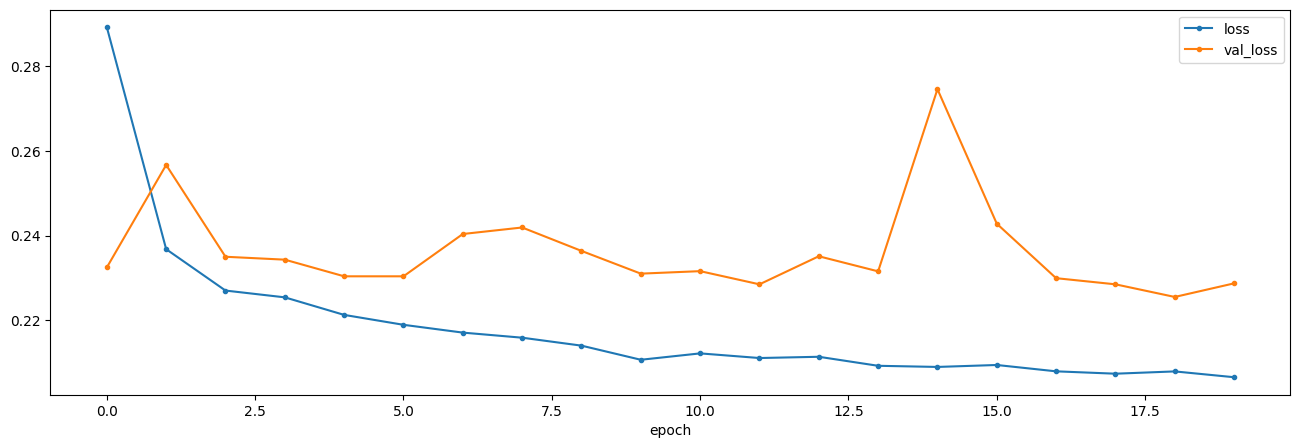

In [20]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history, ['loss', 'val_loss'])

In [21]:
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

In [22]:
model_name = 'n2v_2D_kodak_dataset_01'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


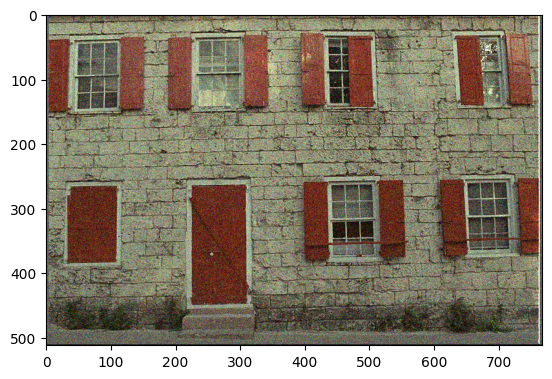

In [23]:
# img = imread('/content/drive/MyDrive/Colab Notebooks/Kodak_Dataset/kodim01.png')
img = imgs[0][0,:,:,:]
# img = img[:,:,:3]
img.dtype
plt.imshow(img)

In [24]:
pred = model.predict(img, axes='YXC')

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 3s 3s/step


In [25]:
pred.shape

(512, 768, 3)

Text(0.5, 1.0, 'Prediction')

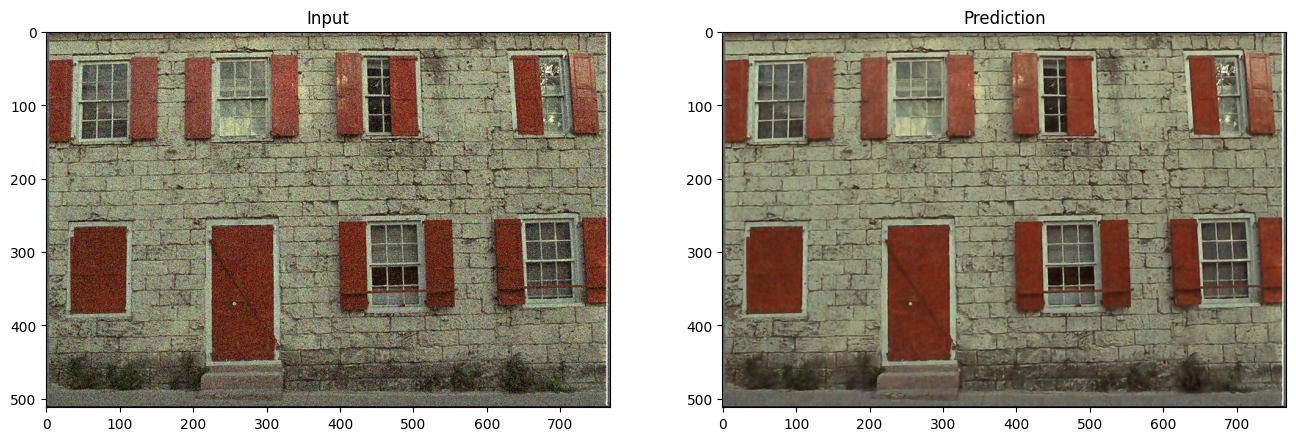

In [26]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input')
plt.subplot(1, 2, 2)
plt.imshow(pred)
plt.title('Prediction')

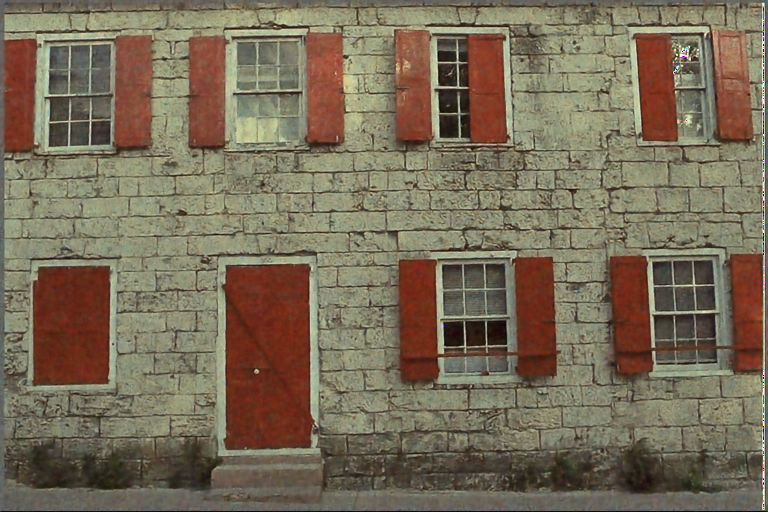

In [27]:
from PIL import Image

img_save = Image.fromarray(np.uint8(255 * pred))
img_save.show()
img_save.save('g.png')

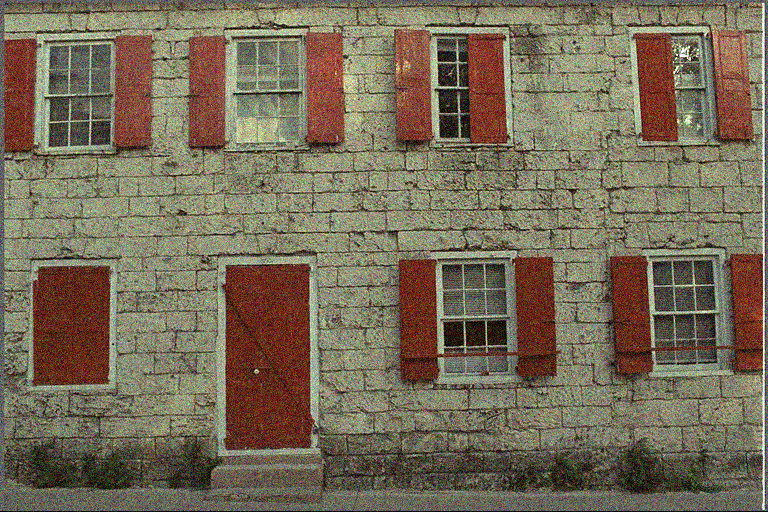

In [28]:
img_original = Image.fromarray(np.uint8(255 * img))
img_original.show()
img_original.save('original.png')